In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [3]:
# 1. Carregar os dados exportados do SQL
df = pd.read_csv("cliente_ltv.csv")

In [4]:
df = df[(df["LTV"] > 0) & (df["Deal"] > 500)]

In [5]:
df

,cliente,LTV,Deal,Revenue Share,Servico extra,corretagem,lt
0,Xp Investimentos(Xp Investimentos ),6750000.0,6750000.0,NaN,NaN,NaN,33
1,Xp Investimentos Cctvm S/A(Xp Investimentos Co...,3460000.0,3460000.0,NaN,NaN,NaN,38
2,Óticas Prevent (Otica Prevent Sao Miguel Pauli...,1951356.0,1944000.0,7356.0,NaN,NaN,22
3,Grupo Salus | Franqueadora (Dso Marketing E Pu...,1637000.0,1637000.0,NaN,NaN,NaN,42
4,Apsen Farmacêutica (Apsen Farmacêutica S.A ),1596200.0,1596200.0,NaN,NaN,NaN,34
...,...,...,...,...,...,...,...
38131,Casa Da Borracha E Correias Ltda - Assessoria ...,505.0,505.0,NaN,NaN,NaN,1
38132,Exclusiva Colchoes - Assessoria Byline - Escop...,505.0,505.0,NaN,NaN,NaN,1
38133,Hplace - Assessoria Byline - Escopo Fechado(Hp...,505.0,505.0,NaN,NaN,NaN,1
38134,Patacho - Assessoria Byline - Escopo Fechado(A...,505.0,505.0,NaN,NaN,NaN,1


In [6]:
df["revenues_medio"] = df["LTV"]/df["lt"]

In [15]:
X_ltv = df[["revenues_medio"]].copy()
X = df[["revenues_medio"]].copy()
X = np.log1p(df[["revenues_medio"]])
kmeans = KMeans(n_clusters=6, random_state=42)
df.loc[:, 'cluster'] = kmeans.fit_predict(X)

# Ordenar os clusters pela média de LTV para nomear as faixas de forma lógica
centroides = kmeans.cluster_centers_.flatten()
ordem_clusters = centroides.argsort()
mapa_faixas = {cluster: f'Faixa {i+1}' for i, cluster in enumerate(ordem_clusters)}
df.loc[:, 'faixa_arpu'] = df['cluster'].map(mapa_faixas)

# Ver quantos clientes tem por faixa
print(df['faixa_arpu'].value_counts().sort_index())

faixa_arpu
Faixa 1     2003
Faixa 2     7331
Faixa 3    15310
Faixa 4     8947
Faixa 5     3093
Faixa 6     1426
Name: count, dtype: int64


In [ ]:
X_ltv = df[["revenues_medio"]].copy()
X = df[["revenues_medio"]].copy()
X = np.log1p(df[["revenues_medio"]])
kmeans = KMeans(n_clusters=6, random_state=42)
df.loc[:, 'cluster'] = kmeans.fit_predict(X)

# Ordenar os clusters pela média de LTV para nomear as faixas de forma lógica
centroides = kmeans.cluster_centers_.flatten()
ordem_clusters = centroides.argsort()
mapa_faixas = {cluster: f'Faixa {i+1}' for i, cluster in enumerate(ordem_clusters)}
df.loc[:, 'faixa_arpu'] = df['cluster'].map(mapa_faixas)

# Ver quantos clientes tem por faixa
print(df['faixa_arpu'].value_counts().sort_index())

faixa_arpu
Faixa 1     2003
Faixa 2     7331
Faixa 3    15310
Faixa 4     8947
Faixa 5     3093
Faixa 6     1426
Name: count, dtype: int64


In [28]:
faixas_valores = df.groupby('faixa_arpu')["revenues_medio"].agg(['min', 'max', 'mean']).round(2).sort_index()
print(faixas_valores)


                 min        max      mean
faixa_arpu                               
Faixa 1       130.00    1307.00    903.01
Faixa 2      1313.00    2625.17   2062.72
Faixa 3      2629.63    4156.25   3438.67
Faixa 4      4157.00    6700.00   5102.05
Faixa 5      6706.31   13698.60   9065.35
Faixa 6     13750.00  204545.45  23194.59


In [79]:
# # 2. Definir faixas de LTV para segmentação
# bins = [0, 30000, 70000, 280000, 500000, 1410000, float('inf')]
# labels = ['0 - 30k', '30k - 70k', '70k - 280k', '280k - 500k', '500k - 1.41mm', '1.41mm+']
# df['faixa_ltv'] = pd.cut(df['LTV'], bins=bins, labels=labels, include_lowest=True)



C:\Users\pedro.pimentel_v4com\AppData\Local\Temp\ipykernel_32200\1345697485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['faixa_ltv'] = pd.cut(df['LTV'], bins=bins, labels=labels, include_lowest=True)


In [17]:
# 3. Calcular viabilidade por cliente
# df['royalties'] = df['LTV'] * 0.17
df['custo_operacional'] = df['LTV'] * 0.70
df['cac'] = 3000
df['custo_total'] = df['custo_operacional'] + df['cac']
df['lucro_estimado'] = df['LTV'] - df['custo_total']
df['viavel'] = df['lucro_estimado'] > 0



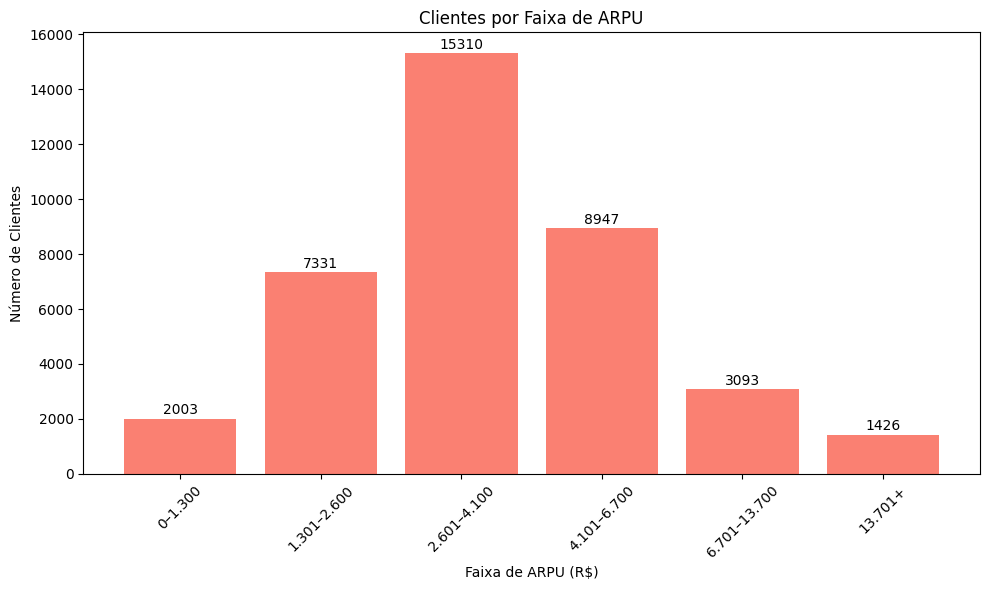

In [30]:
# 4. Histograma de clientes por faixa de ARPU
hist_data = df['faixa_arpu'].value_counts().sort_index()

# Mapear os nomes das faixas para os intervalos
faixa_labels = {
    'Faixa 1': '0–1.300',
    'Faixa 2': '1.301–2.600',
    'Faixa 3': '2.601–4.100',
    'Faixa 4': '4.101–6.700',
    'Faixa 5': '6.701–13.700',
    'Faixa 6': '13.701+'
}

# Aplicar os labels
labels_ordenados = [faixa_labels[nome] for nome in hist_data.index]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels_ordenados, hist_data.values, color='salmon')
plt.title("Clientes por Faixa de ARPU")
plt.ylabel("Número de Clientes")
plt.xlabel("Faixa de ARPU (R$)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [29]:
# 5. Lucro médio por faixa
lucro_por_faixa = df.groupby('faixa_arpu')['lucro_estimado'].mean().round(2)
print("\nLucro médio por faixa de Arpu:")
print(lucro_por_faixa)




Lucro médio por faixa de Arpu:
faixa_arpu
Faixa 1    -1688.43
Faixa 2      966.74
Faixa 3     4565.79
Faixa 4     7953.35
Faixa 5    12564.49
Faixa 6    25106.88
Name: lucro_estimado, dtype: float64


In [26]:
# 6. % de clientes inviáveis
total_clientes = len(df)
clientes_inviaveis = len(df[df['viavel'] == False])
pct_inviaveis = (clientes_inviaveis / total_clientes) * 100
print(f"\nClientes inviáveis (<0 de lucro): {clientes_inviaveis} de {total_clientes} ({pct_inviaveis:.2f}%)")



Clientes inviáveis (<0 de lucro): 11160 de 38110 (29.28%)


In [27]:
# 7. Tabela resumo por faixa
resumo = df.groupby('faixa_arpu').agg(
    qtd_clientes=('cliente', 'count'),
    receita_total=('LTV', 'sum'),
    lucro_medio=('lucro_estimado', 'mean'),
    pct_viaveis=('viavel', lambda x: round(x.mean() * 100, 2))
).reset_index()

print("\nResumo por faixa de LTV:")
print(resumo)


Resumo por faixa de LTV:
  faixa_arpu  qtd_clientes  receita_total   lucro_medio  pct_viaveis
0    Faixa 1          2003   8.756917e+06  -1688.429825         8.74
1    Faixa 2          7331   9.693394e+07    966.741403        47.17
2    Faixa 3         15310   3.861076e+08   4565.791924        79.34
3    Faixa 4          8947   3.266655e+08   7953.352021        81.32
4    Faixa 5          3093   1.604699e+08  12564.492544        79.79
5    Faixa 6          1426   1.336014e+08  25106.883194       100.00


In [107]:
df

,cliente,LTV,Deal,Revenue Share,Servico extra,corretagem,lt,cluster,faixa_ltv,custo_operacional,cac,custo_total,lucro_estimado,viavel
0,Xp Investimentos(Xp Investimentos ),6750000.0,6750000.0,NaN,NaN,NaN,33,2,Faixa 6,4725000.0,3000,4728000.0,2022000.0,True
1,Xp Investimentos Cctvm S/A(Xp Investimentos Co...,3460000.0,3460000.0,NaN,NaN,NaN,38,2,Faixa 6,2422000.0,3000,2425000.0,1035000.0,True
2,Óticas Prevent (Otica Prevent Sao Miguel Pauli...,1951356.0,1944000.0,7356.0,NaN,NaN,22,2,Faixa 6,1365949.2,3000,1368949.2,582406.8,True
3,Grupo Salus | Franqueadora (Dso Marketing E Pu...,1637000.0,1637000.0,NaN,NaN,NaN,42,2,Faixa 6,1145900.0,3000,1148900.0,488100.0,True
4,Apsen Farmacêutica (Apsen Farmacêutica S.A ),1596200.0,1596200.0,NaN,NaN,NaN,34,2,Faixa 6,1117340.0,3000,1120340.0,475860.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38131,Casa Da Borracha E Correias Ltda - Assessoria ...,505.0,505.0,NaN,NaN,NaN,1,4,Faixa 1,353.5,3000,3353.5,-2848.5,False
38132,Exclusiva Colchoes - Assessoria Byline - Escop...,505.0,505.0,NaN,NaN,NaN,1,4,Faixa 1,353.5,3000,3353.5,-2848.5,False
38133,Hplace - Assessoria Byline - Escopo Fechado(Hp...,505.0,505.0,NaN,NaN,NaN,1,4,Faixa 1,353.5,3000,3353.5,-2848.5,False
38134,Patacho - Assessoria Byline - Escopo Fechado(A...,505.0,505.0,NaN,NaN,NaN,1,4,Faixa 1,353.5,3000,3353.5,-2848.5,False


In [14]:
# df["revenues_medio"] = df["LTV"]/df["lt"]

In [15]:
df

,cliente,LTV,Deal,Revenue Share,Servico extra,corretagem,lt,cluster,faixa_ltv,custo_operacional,cac,custo_total,lucro_estimado,viavel,revenues_medio
0,Xp Investimentos(Xp Investimentos ),6750000.0,6750000.0,NaN,NaN,NaN,33,2,Faixa 6,4725000.0,3000,4728000.0,2022000.0,True,204545.454545
1,Xp Investimentos Cctvm S/A(Xp Investimentos Co...,3460000.0,3460000.0,NaN,NaN,NaN,38,2,Faixa 6,2422000.0,3000,2425000.0,1035000.0,True,91052.631579
2,Óticas Prevent (Otica Prevent Sao Miguel Pauli...,1951356.0,1944000.0,7356.0,NaN,NaN,22,2,Faixa 6,1365949.2,3000,1368949.2,582406.8,True,88698.000000
3,Grupo Salus | Franqueadora (Dso Marketing E Pu...,1637000.0,1637000.0,NaN,NaN,NaN,42,2,Faixa 6,1145900.0,3000,1148900.0,488100.0,True,38976.190476
4,Apsen Farmacêutica (Apsen Farmacêutica S.A ),1596200.0,1596200.0,NaN,NaN,NaN,34,2,Faixa 6,1117340.0,3000,1120340.0,475860.0,True,46947.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38131,Casa Da Borracha E Correias Ltda - Assessoria ...,505.0,505.0,NaN,NaN,NaN,1,4,Faixa 1,353.5,3000,3353.5,-2848.5,False,505.000000
38132,Exclusiva Colchoes - Assessoria Byline - Escop...,505.0,505.0,NaN,NaN,NaN,1,4,Faixa 1,353.5,3000,3353.5,-2848.5,False,505.000000
38133,Hplace - Assessoria Byline - Escopo Fechado(Hp...,505.0,505.0,NaN,NaN,NaN,1,4,Faixa 1,353.5,3000,3353.5,-2848.5,False,505.000000
38134,Patacho - Assessoria Byline - Escopo Fechado(A...,505.0,505.0,NaN,NaN,NaN,1,4,Faixa 1,353.5,3000,3353.5,-2848.5,False,505.000000


In [22]:
cliente = df[df["cliente"] == "Luxuries(Alpha Comercio Digital Ltda)"].iloc[0]

lt = int(cliente["lt"])  
cac = cliente["cac"]
revenues_mensais = cliente["revenues_medio"]

meses = np.arange(lt + 1)
receita_acumulada = revenues_mensais * meses
lucro_acumulado = receita_acumulada - cac

payback_index = np.argmax(lucro_acumulado >= 0)

In [24]:
def plot_ltv_cac(df, nome_cliente):
    cliente = df[df["cliente"] == nome_cliente].iloc[0]
    lt = int(cliente["lt"])  
    cac = cliente["cac"]
    revenues_mensais = cliente["revenues_medio"]

    meses = np.arange(lt + 1)
    receita_acumulada = revenues_mensais * meses
    lucro_acumulado = receita_acumulada - cac

    payback_index = np.argmax(lucro_acumulado >= 0)

    # Gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(meses, lucro_acumulado, label='LTV acumulado', color='green')
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(payback_index, color='blue', linestyle='--', label='CAC Payback')
    plt.fill_between(meses[:payback_index+1], lucro_acumulado[:payback_index+1], 0, color='red', alpha=0.3, label='CAC')
    plt.fill_between(meses[payback_index:], lucro_acumulado[payback_index:], 0, color='green', alpha=0.3, label='Retorno')
    plt.title(f"LTV vs CAC Payback - {cliente['cliente'][:50]}...")
    plt.xlabel("Meses")
    plt.ylabel("Lucro Acumulado (R$)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


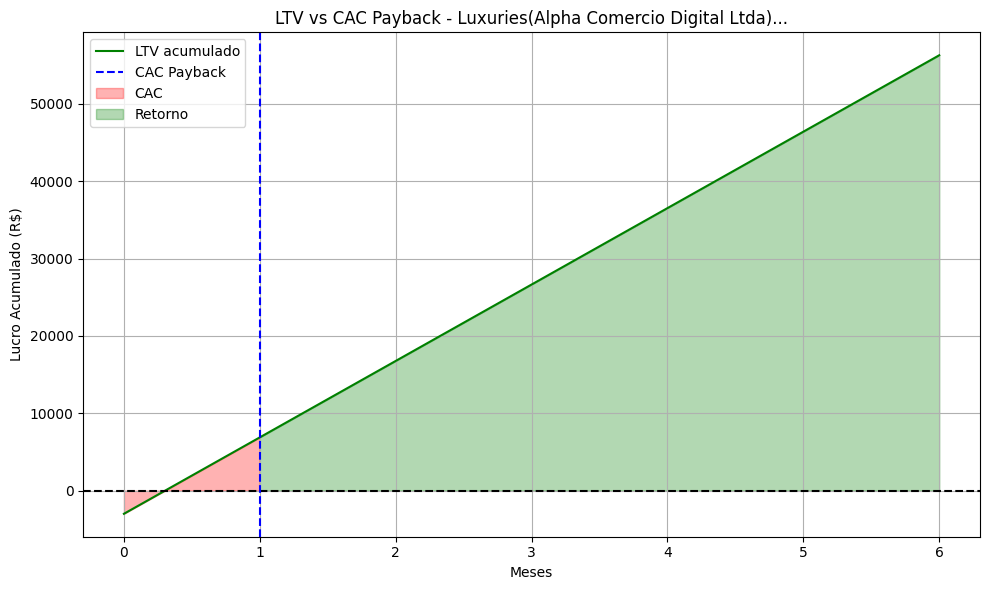

In [25]:
plot_ltv_cac(df, "Luxuries(Alpha Comercio Digital Ltda)")
